In [8]:
import pandas as pd

## Assignment 2 in ML
### Ostapovich Oleg

#### Section 1: Data Reading

In [9]:
data_train = pd.read_csv('data/stream_quality_train.csv')
data_test = pd.read_csv('data/stream_quality_test.csv')

In [10]:
print(data_train.shape, data_test.shape)

(760552, 12) (129978, 12)


#### Section 2: Exploration and preprocessing

In [11]:
data_train.head()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,packet_loss_rate,packet_loss_std,y
0,0.744824,0.025512,0.786908,0.013918,0.00323,0.0,0.00323,0.066147,0.010390,0.000250,0.000000,1.0
1,0.744824,0.025512,0.810122,0.055803,0.00323,0.0,0.00323,0.077022,0.041797,0.031492,0.153055,1.0
2,0.734408,0.076537,0.791670,0.031781,0.00323,0.0,0.00323,0.069172,0.017070,0.000250,0.000000,1.0
3,0.750031,0.000000,0.826193,0.015573,0.00323,0.0,0.00323,0.061703,0.021221,0.003121,0.014067,1.0
4,0.703162,0.159856,0.816669,0.005438,0.00323,0.0,0.00323,0.040957,0.062898,0.003121,0.014067,1.0


According Pandas Profiling, datasets are free from outliers, data is normalized, all categorical features are encoded. That's why the only thing left is separate Y column from other data.

In [12]:
y_train = data_train['y']
x_train = data_train.drop(['y'], axis=1)

y_test = data_test['y']
x_test = data_test.drop(['y'], axis=1)

Also for future tasks we need to find correlation

In [13]:
abs(data_train.corr().y)

fps_mean               0.182148
fps_std                0.051231
rtt_mean               0.237470
rtt_std                0.022025
dropped_frames_mean    0.011221
dropped_frames_std     0.009314
dropped_frames_max     0.005493
bitrate_mean           0.630298
bitrate_std            0.196570
packet_loss_rate       0.037425
packet_loss_std        0.052503
y                      1.000000
Name: y, dtype: float64

Here we can see that 'bitrate_mean', 'bitrate_std', 'rtt_mean', 'fps_mean' columns have the most correlation coefficient to Y

In [14]:
selected_features = ['bitrate_mean', 'bitrate_std', 'rtt_mean', 'fps_mean']

### Task 1

#### Section 3.1: Machine learning or Deep learning model defining, training and hyper-parameters turning

In [ ]:
from torchsummary import summary
import torch
import torch.nn as nn
device = torch.device("cuda:0")

In [ ]:
class StartModel(nn.Module):
    def __init__(self):
        super(StartModel, self).__init__()
        self.network=nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.Conv2d(32, 32, 3, padding=1),

            nn.MaxPool2d(2, 2),

            nn.Conv2d(32, 64, 3,padding=1),
            nn.Conv2d(64, 64, 3,padding=1),

            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3,padding=1),
            nn.Conv2d(128, 128, 3,padding=1),

            nn.MaxPool2d(2, 2),

            nn.Flatten(),

            nn.Linear(2048, 512),
            nn.Linear(512, 43))

    def forward(self, x):
        return self.network(x)

startmodel = StartModel().to(device)
summary(startmodel, (3, 32, 32))

### Task 2

#### Section 3.2: Machine learning or Deep learning model defining, training and hyper-parameters turning

In [18]:
from sklearn.ensemble import RandomForestClassifier
randomforestfunc = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=9)
randomforest = randomforestfunc.fit(x_train[selected_features],y_train)

#### Section 4.2: Model performance evaluation

In [19]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = randomforest.predict(x_test[selected_features])
print("Accuracy:", accuracy_score(y_test,y_pred))
print("F1-score:", f1_score(y_test,y_pred,average='weighted'))

Accuracy: 0.8515748819030913
F1-score: 0.8510504955630035


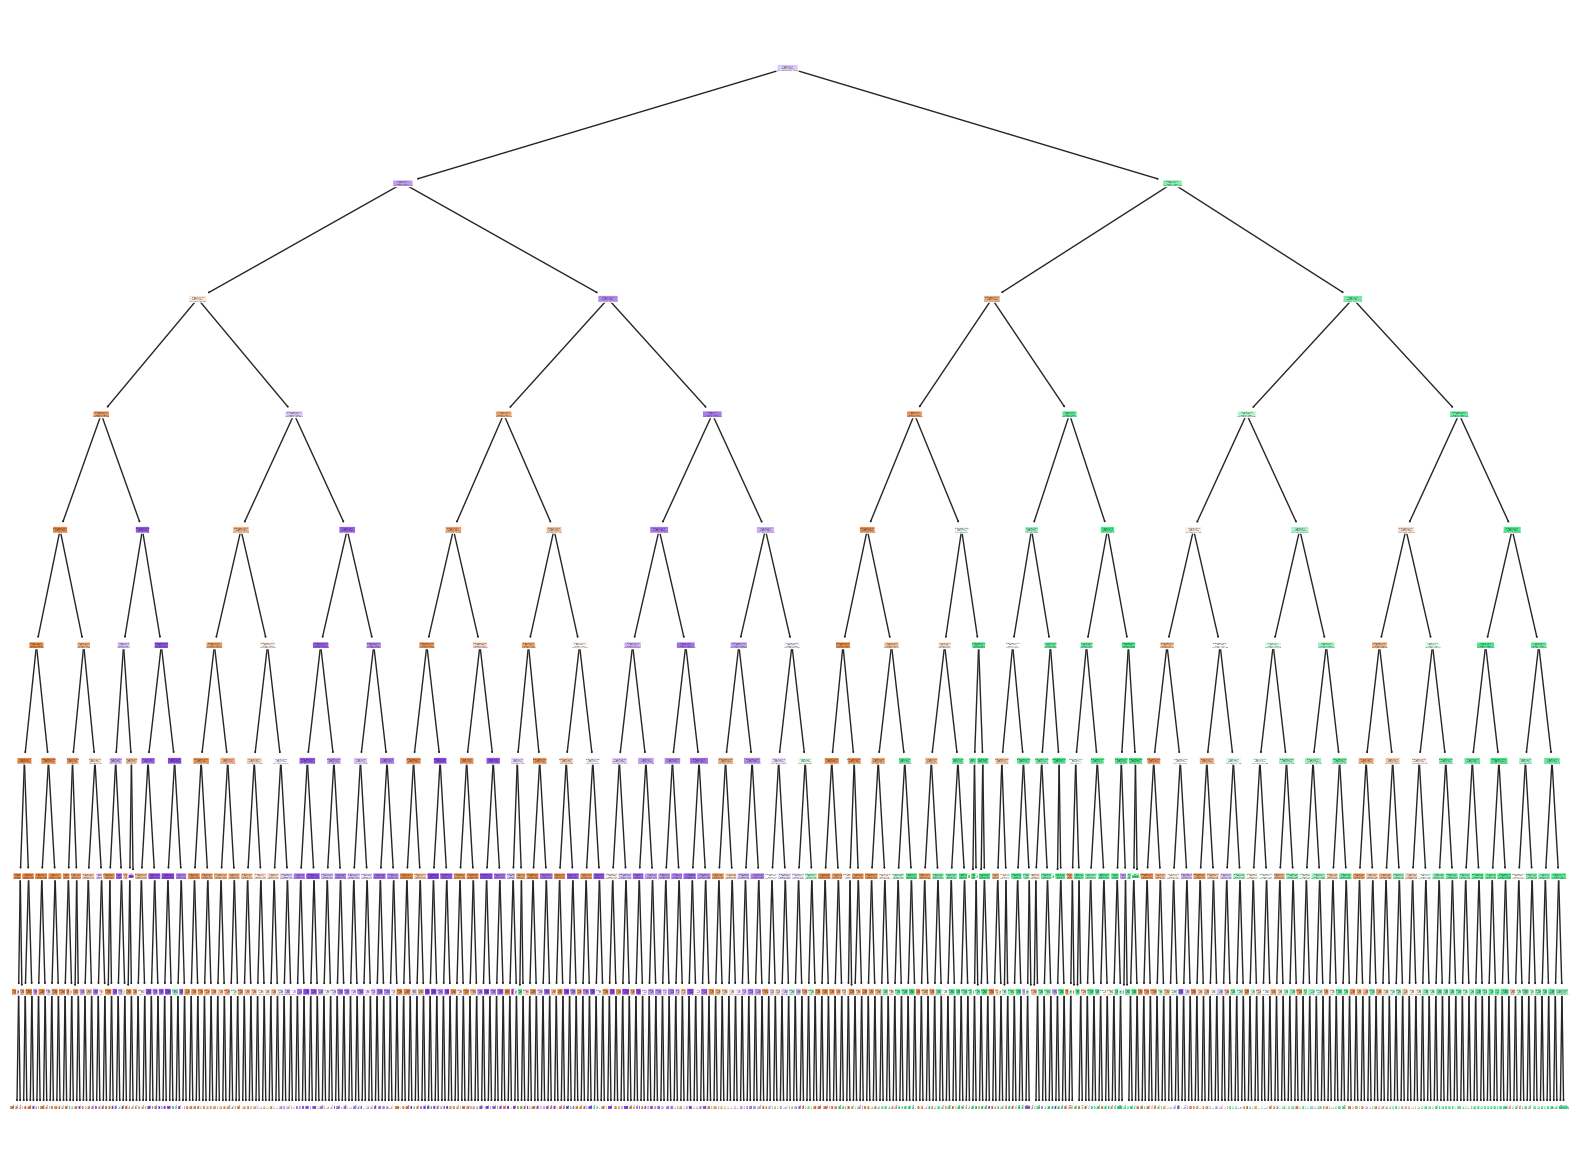

In [21]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(20, 15))
plot_tree(randomforest.estimators_[0],
          feature_names=x_train[selected_features].columns,
          filled=True, impurity=True,
          rounded=True)
plt.show()

#### Section 5: Conclusion and possible improvements